# Import Required Packages

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Number 1


I put the csv file on my github repository so that the file is easily downloaded.

In [ ]:
sample = pd.read_csv("https://raw.githubusercontent.com/faizarsalan/resource/main/mydataset.csv?token=ATAWW2Y4XJVJKHNBORESUJLARPLNI")

Next, I want to see the data as a whole. Find what are the types and columns.

In [ ]:
sample

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


**Data types**

In [ ]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   11466 non-null  int64  
 1   name                 11466 non-null  object 
 2   host_id              11466 non-null  int64  
 3   host_name            11450 non-null  object 
 4   neighbourhood_group  0 non-null      float64
 5   neighbourhood        11466 non-null  object 
 6   latitude             11466 non-null  float64
 7   longitude            11466 non-null  float64
 8   room_type            11466 non-null  object 
 9   price                11466 non-null  int64  
 10  minimum_nights       11466 non-null  int64  
 11  number_of_reviews    11466 non-null  int64  
 12  last_review          9789 non-null   object 
 13  reviews_per_month    9789 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


From the **info()** function non-null count is displaying 0. This means that there is no data. Hence, we can pop the neighbourhood_group.

In [ ]:
sample.pop("neighbourhood_group")

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
11461   NaN
11462   NaN
11463   NaN
11464   NaN
11465   NaN
Name: neighbourhood_group, Length: 11466, dtype: float64

After the neighbourhood_group has been popped, we continue to analyze the data. Using the **describe()** function we can know the **count**, **mean**, **min**, **max**, and etc.

In [ ]:
sample.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,1.146600e+04,11466.000000,11466.000000,1.146600e+04,11466.000000,11466.000000,9789.000000
mean,2.640545e+07,1.399776e+08,35.687159,139.734537,1.498470e+04,3.316239,26.028868,2.262540
std,7.565212e+06,8.064289e+07,0.217853,0.092771,3.327345e+04,7.766766,38.455449,1.744004
min,3.530300e+04,1.519770e+05,27.072330,139.130020,0.000000e+00,1.000000,0.000000,0.040000
25%,2.215251e+07,5.783171e+07,35.679620,139.698975,6.026000e+03,1.000000,2.000000,1.000000
50%,2.841873e+07,1.502326e+08,35.701910,139.729165,1.000700e+04,1.000000,12.000000,2.060000
75%,3.222416e+07,2.135896e+08,35.724215,139.784270,1.721600e+04,2.000000,32.000000,3.170000
max,3.608660e+07,2.714130e+08,35.832430,142.202880,1.000046e+06,180.000000,453.000000,51.210000


# Number 2


Before we can identify the variables and determine each variables whether it is a *discrete* variable or *continuous* variable, we need to clean the data before hand. 

We can first check by searching for variables that are NaN.

In [ ]:
for x in sample:
  print(x, ":", sample[x].isna().values.any())

id : False
name : False
host_id : False
host_name : True
neighbourhood : False
latitude : False
longitude : False
room_type : False
price : False
minimum_nights : False
number_of_reviews : False
last_review : True
reviews_per_month : True


From the result above, **host_name**, **last_review**, and **reviews_per_month** have at least a NaN value. But, **host_name** is excluded because the entire column stores the name of the host which is a string (object) type. In the other hand, **last_review** and **reviews_per_month** can be filled with any value. My assumption is that both variables does not have any significant effect to the data. So, we can fill the NaN value with 0. 

In [ ]:
sample = sample.fillna(value=0)

After that, we can identify which variable is discrete and which one is continuous.

Generally, discrete variables are variables that have distinct values. In the other hand, continuous variables are variables that is in a certain range, usually in a data type of float. 

We can conclude that **id**, **host_id**, **price**, **minimum_nights**, **number_of_reviews** are categorized as discrete variable. While **longitude**, **latitude**, and **reviews_per_month** are categorized as continuous variable. We can check this using the **unique()** function.

***Discrete Variables***

In [ ]:
sample['id'].unique()

array([   35303,   197677,   289597, ..., 36084566, 36085357, 36086604])

In [ ]:
sample['host_id'].unique()

array([   151977,    964081,    341577, ..., 267308886, 271413041,
        51517847])

In [ ]:
sample['minimum_nights'].unique()

array([ 28,   3,  30,  29,   1,   5,   2,   4,   7,  35,   6,  14,  31,
        10, 180, 120,  21,  20,  32,  50,   8,  15,  60,  90,  55,  23,
        24,  13, 179,  26])

In [ ]:
sample['number_of_reviews'].unique()

array([ 18, 156, 107,  99, 101, 215,  41,  90, 175,  85, 200, 233,  73,
        86, 127,  49, 306, 144, 197, 218, 213, 271, 147, 118, 151, 124,
         5,  71, 274,  22,   0,  17, 160,   7,  14,  70,  78, 140,  67,
       183,  27,  62,   6,   3, 103, 105,  50, 138, 109,  77, 296,  44,
       113,  89, 119,  55,  54, 141,  58,  76,  34,  42,  10,  25, 188,
       187,  63, 251, 167,  82, 110,  30,  53, 120,  39, 171, 417,  66,
       112, 293, 180,  21,  19,  11,  43,  32, 239, 208, 219,  28,  15,
        47,  37, 130, 223, 194, 177, 166, 106, 173, 255, 235, 134, 211,
       244, 212,  87,  38,   4,  69, 182,   2, 117,  75, 164,  97, 207,
        74,  26,  52, 121, 265,  94,  23,  12,  72, 181, 169,  13,   8,
         9, 178, 168, 172, 135, 128, 184, 259,  36,  46, 163, 123, 158,
        64,  60, 230, 203, 179,  84, 149, 243, 199,  35,  40, 206,  93,
       100, 115, 133,  24, 143,  29,  98, 191, 131, 246, 125, 136, 224,
       238, 228, 176, 262, 409, 198,  33,  56,  20, 222, 229, 20

***Continuous Variables***

In [ ]:
sample['longitude'].unique()

array([139.71203, 139.82596, 139.6581 , ..., 139.6898 , 139.78078,
       139.87236])

In [ ]:
sample['latitude'].unique()

array([35.67152, 35.71721, 35.74267, ..., 35.74279, 35.70656, 35.69889])

In [ ]:
sample['reviews_per_month'].unique()

array([2.000e-01, 1.650e+00, 1.250e+00, 1.550e+00, 1.240e+00, 2.680e+00,
       5.400e-01, 1.160e+00, 2.310e+00, 2.650e+00, 2.640e+00, 3.310e+00,
       1.020e+00, 1.220e+00, 1.750e+00, 2.400e+00, 6.900e-01, 4.190e+00,
       2.070e+00, 2.750e+00, 3.090e+00, 2.980e+00, 3.780e+00, 2.080e+00,
       1.680e+00, 2.140e+00, 1.770e+00, 6.000e-01, 4.300e-01, 1.110e+00,
       3.960e+00, 3.360e+00, 3.300e-01, 0.000e+00, 3.190e+00, 2.500e-01,
       1.570e+00, 2.380e+00, 3.250e+00, 1.300e-01, 2.700e-01, 2.290e+00,
       1.070e+00, 2.190e+00, 1.050e+00, 1.210e+00, 1.100e+00, 4.120e+00,
       4.700e-01, 1.280e+00, 1.200e-01, 3.510e+00, 3.800e-01, 6.000e-02,
       1.720e+00, 8.400e-01, 2.260e+00, 1.880e+00, 1.340e+00, 4.830e+00,
       9.600e-01, 1.900e+00, 1.470e+00, 1.990e+00, 1.150e+00, 9.300e-01,
       2.330e+00, 9.900e-01, 2.990e+00, 5.700e-01, 1.100e-01, 8.100e-01,
       1.800e-01, 3.290e+00, 1.330e+00, 4.290e+00, 2.880e+00, 2.100e+00,
       5.300e-01, 9.400e-01, 2.340e+00, 2.520e+00, 

Finally, we can plot the variables. I am using seaborn to plot the variables.

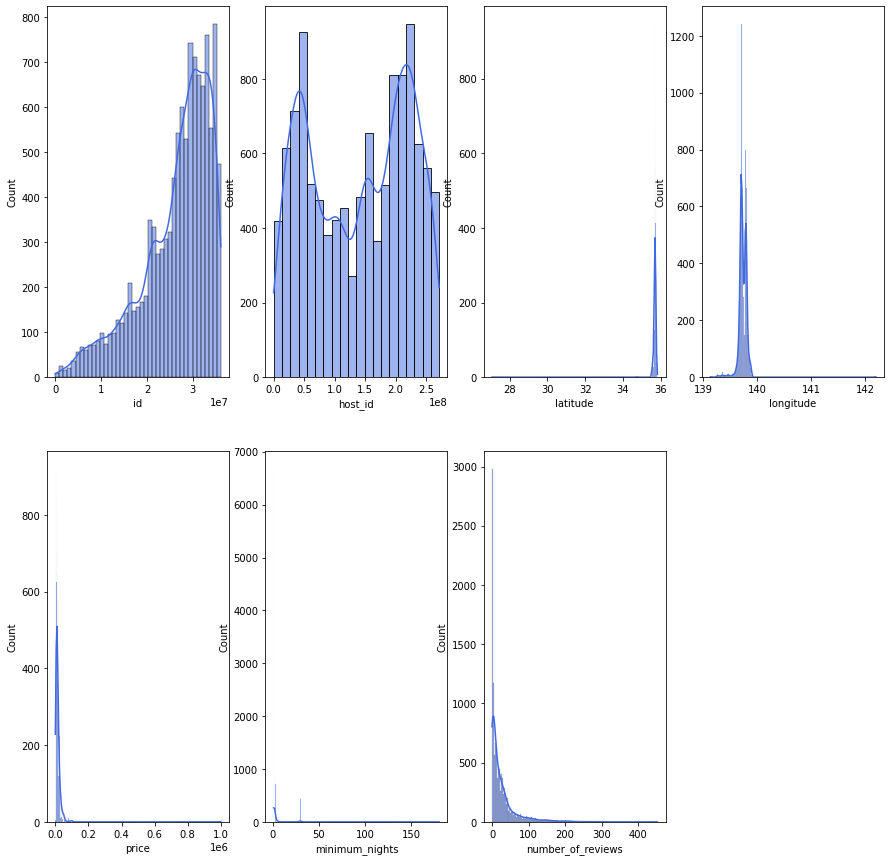

In [ ]:
column=['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_momth']
plt.figure(figsize=(15, 15))
for j in range(1,8):
    plt.subplot(2,4,j)
    sns.histplot(sample[column[j-1]], kde=True, color="royalblue")

# Number 3

To further strengthen our understanding of the data, we can use correlation matrix. It is used so that we can determine which variable is **Y** and which one is effecting Y. I use seaborn to visualize the correlation matrix.

Before we do that, we can drop some variables such as **id** and **host_id**. This is due to the fact that they will not serve any purpose on predicting the model.

We can also convert the **room_type** variable from object to int by setting a number to each room type.

In [ ]:
sample['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

Since the data only have 3 types, we can assign each type into a number from 0 to 2

In [ ]:
value = {'Entire home/apt':1,'Private room':2,'Shared room':3}
sample['room_type'] = sample['room_type'].map(value)

**Dropping id and host_id**

In [ ]:
sample.pop('id')
sample.pop('host_id')

0           151977
1           964081
2           341577
3          1573631
4           341577
           ...    
11461    235406925
11462    267481408
11463    161702799
11464    208189463
11465    254667806
Name: host_id, Length: 11466, dtype: int64

**Visualizing the correlation matrix using seaborn**

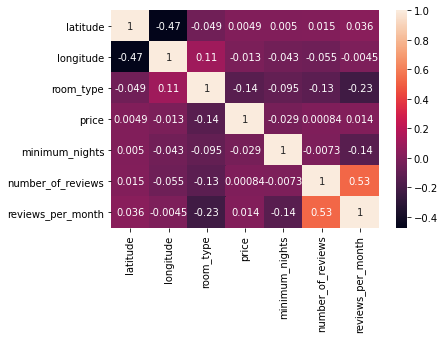

In [ ]:
cmatrix = sample.corr()
sns.heatmap(data = cmatrix, annot=True)

**a**. From the correlation matrix above, I concluded that the **Y** is the **reviews_per_month** since it has a strong correlation with other variables. This is due to the fact that the closer it is to a **1**, the stronger the correlation. 

**b**. **The predictor** of Y are **latitude**, **price**, and **number_of_reviews**. This is due to the fact that they have a stronger correlation than **longitude**, **room_type**, and **minimum_nights**.

**c**. As previously mentioned,**longitude**, **room_type**, and **minimum_nights** are the variables that does not have a strong correlation with **reviews_per_month** since they have negative values. Furthermore, both variables have negative values which are not a good predictor candidate.  

# Number 4

Before making a model using Linear Regression, we have to assign the **Y** and **the predictors** of Y to a variable. In this case **Y** is assigned to Y and **the predictors** is assigned to X.

The **train_test_split** function has a purpose to split the arrays into random train and test subsets.
In this case, the test size is 20% of data with a random state of 42 to maintain the reproducibility of the data.

In [ ]:
X = sample[["latitude", "price", "number_of_reviews"]]
Y = sample["reviews_per_month"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

We use the **LinearRegression()** function to make a model using the **.fit** function. Then, we put the test data into the model that we have made using the **.predict** function.

After that, I made an empty array to store the values of the coefficient and the intercept namely theta. Then, use the **.coef_** and **.intercept_** function. These can be used as the theta to predict the model. 

**.score** function returns the coefficient of determination r2 of the prediction.

In [ ]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)

print(prediction)

theta = np.zeros(4)
theta = LRM.coef_
theta = np.insert(theta, 0, LRM.intercept_, axis=0)

for i, data in enumerate(theta):
  print("Theta ",i,":",data)

LRM.score(XTest, YTest)

[1.35326985 1.30544273 1.32039096 ... 1.41413834 1.30558404 2.07708646]
Theta  0 : -6.559473408640178
Theta  1 : 0.21932289419047735
Theta  2 : 7.116376292458989e-07
Theta  3 : 0.025442488257217566


0.31637806844357974

# Number 5

I am going to use R2 score, mean absolute error, and mean squared error as the evaluation metrics

In [ ]:
print("R2  :", r2_score(YTest, prediction))
print("MAE :", mean_absolute_error(YTest, prediction))
print("MSE :", mean_squared_error(YTest, prediction))

R2  : 0.31637806844357974
MAE : 1.0806666063534978
MSE : 1.8231955820013852


# Number 6

## a.

I am going to compare the score between univariate linear regression (one variable) and multivariate linear regression (multiple variable). First, we predict the data using the multivariate linear regression model that we have made followed by a new univariate linear regression.

***Predict the data using multivariate linear regression***

In [ ]:
latitude = [35.74267, 35.66255, 35.67152, 35.69889]
price = [4196, 3981, 7747, 10975]
number_of_reviews = [1.55, 1.24, 1.65, 1.25]
rpm = np.zeros(4)
for i in range(4):
  rpm[i] = theta[0] + theta[1] * latitude[i] + theta[2] * price[i] + theta[3] * number_of_reviews[i]
  print("Reviews per month ",i+1,": ", rpm[i])

print("R2  :", r2_score(YTest, prediction))

Reviews per month  1 :  1.3221343101459726
Reviews per month  2 :  1.2965219864134077
Reviews per month  3 :  1.311600760271495
Reviews per month  4 :  1.3097237988498074
R2  : 0.31637806844357974


Now, lets use univariate linear regression

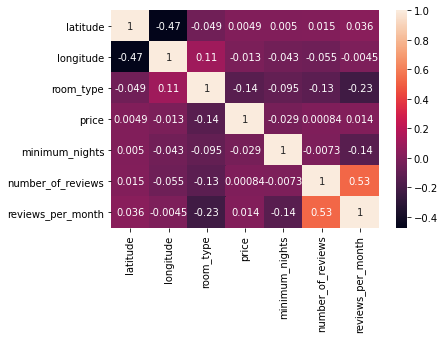

In [ ]:
sns.heatmap(data = cmatrix, annot = True)

From the correlation matrix above, we can conclude that **number_of_reviews** has the strongest correlation with our **Y**. Therefore, the best descriptor of **Y** is **number_of_reviews**.

***Univariate Linear Regression***

In [ ]:
X = sample[["number_of_reviews"]]
Y = sample["reviews_per_month"]
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2, random_state = 42)

Now, lets make the model for the univariate linear regression. It is the similar to multivariate linear regression. The only difference is the number of variable used.

In [ ]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)

print(prediction)

theta = np.zeros(2)
theta[0] = LRM.intercept_
theta[1] = LRM.coef_

for i, data in enumerate(theta):
  print("Theta ",i,":",data)

LRM.score(XTest, YTest)

[1.32874814 1.30329045 1.30329045 ... 1.40512119 1.32874814 2.06702095]
Theta  0 : 1.277832770219132
Theta  1 : 0.025457683218580062


0.31461512317549434

Lets, predict the data

In [ ]:
number_of_reviews = [1.55, 1.24, 1.65, 1.25]
for i in number_of_reviews:
  print("Number of reviews :", theta[0] + theta[1]*number_of_reviews[i])

TypeError: ignored

## b.